# Importing Modules

In [1]:
# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# To Train our data
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut


# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV


In [2]:
import sys
sys.path.append("../scripts")
from ml_pipeline import run_train_pipeline,dvc_get_data
from db_api import Database_api

In [3]:
db_api = Database_api()

# Getting data from the preproccessed table

In [4]:
warehouse = db_api.get_db_data_from_table_name('mlready_warehouse')

2022-08-10 20:21:08,464:logger:successfully fetched the data


In [5]:
warehouse

,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,net_cost,row_num,ER,CTR,TR
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422222,rom3zao,3c741855acd9576b4e311d5cd990ae77/ce493e9ed768f...,impression,300.0,250.0,b385e5s9,ca74860c-fa94-425b-b51a-9ef28ae7279e,2021-02-08 18:17:49.721000+00:00,United States,afk.guide,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422223,rom3zao,ccce5533b26203d07100376c394951a6/e69efe69bb576...,impression,300.0,250.0,s54usm6e,19618aa3-af95-44f2-beea-06958d0af730,2021-02-08 18:17:50.782000+00:00,United States,www.acommunaltable.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422224,rom3zao,676e0507f9e1ed8fa6880eafcf91547b/fee75db580219...,impression,300.0,250.0,aydslxzq,347bde1b-1b7b-4adf-8603-0dd1954466ee,2021-02-08 18:17:51.290000+00:00,United States,g1.globo.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422225,rom3zao,38534b16ec1e64274db67b5de478c86d/1184b78ee9795...,impression,300.0,250.0,18mljlwy,2440c057-02e7-4440-bcfb-15b113d1df18,2021-02-08 18:17:52.325000+00:00,United States,www.foxnews.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029


# order the data with campaign id
    - I am doing this because while dividing the data between traing and testsets i want to get diffrent campaigns on both ends so that our prediction would be close to non biased one

In [6]:
warehouse = warehouse.sort_values(by='campaign_id', ascending=False)
# warehouse

In [7]:
choosen_df = warehouse[['ER' ,'gross_costbudget' , 'currency' , 'blackwhiteaudience_list_included','net_cost', 'percentage' , 'platform_os' , "buy_rate_cpe" , "geo_country" , "cost_centre" , "site_name"]]

In [8]:
choosen_df.dropna(inplace=True)
choosen_df

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ER,gross_costbudget,currency,blackwhiteaudience_list_included,net_cost,percentage,platform_os,buy_rate_cpe,geo_country,cost_centre,site_name
211113,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,www.wholesomerecipebox.com
205704,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,parenting.firstcry.com
205709,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,word.tips
205708,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,chessmoba.us
205707,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,newsinfo.inquirer.net
...,...,...,...,...,...,...,...,...,...,...,...
97373,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97374,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.ebaumsworld.com
97375,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97376,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.smartcarofamerica.com


In [9]:
y = choosen_df['ER']
x = choosen_df.drop(columns=["ER"])
x

,gross_costbudget,currency,blackwhiteaudience_list_included,net_cost,percentage,platform_os,buy_rate_cpe,geo_country,cost_centre,site_name
211113,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,www.wholesomerecipebox.com
205704,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,parenting.firstcry.com
205709,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,word.tips
205708,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,chessmoba.us
205707,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,newsinfo.inquirer.net
...,...,...,...,...,...,...,...,...,...,...
97373,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97374,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.ebaumsworld.com
97375,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97376,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.smartcarofamerica.com


In [10]:
y

211113     4.998925
205704     4.998925
205709     4.998925
205708     4.998925
205707     4.998925
            ...    
97373     14.682393
97374     14.682393
97375     14.682393
97376     14.682393
101646    14.682393
Name: ER, Length: 422223, dtype: float64

# Modeling our data using Random Forest Algorithm

In [11]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
str(model)

'RandomForestRegressor(n_estimators=10, random_state=42)'

inside train pipeline
inside label encoder


2022-08-10 20:21:13,306:logger:successfully got catagorical columns
2022-08-10 20:21:15,027:logger:successfully got catagorical columns
2022-08-10 20:21:15,040:logger:successfully got numerical columns
2022-08-10 20:21:19,963:logger:RMSE Score: 6.186850728967282
2022-08-10 20:21:19,965:logger:R2_Squared: -0.32360487090499235
2022-08-10 20:21:19,967:logger:MAE Score: 5.019926361110263
2022-08-10 20:21:19,973:logger:Accuracy: 54.9 %.
2022-08-10 20:21:20,109:logger:feature importance plotted
2022/08/10 20:21:20 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest with cleaned data' does not exist. Creating a new experiment.
2022-08-10 20:22:20,915:logger:API request to http://localhost:5000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))


Run - sixth_run is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 6.19, 'R2_Squared': -0.32, 'MAE Score': 5.02}

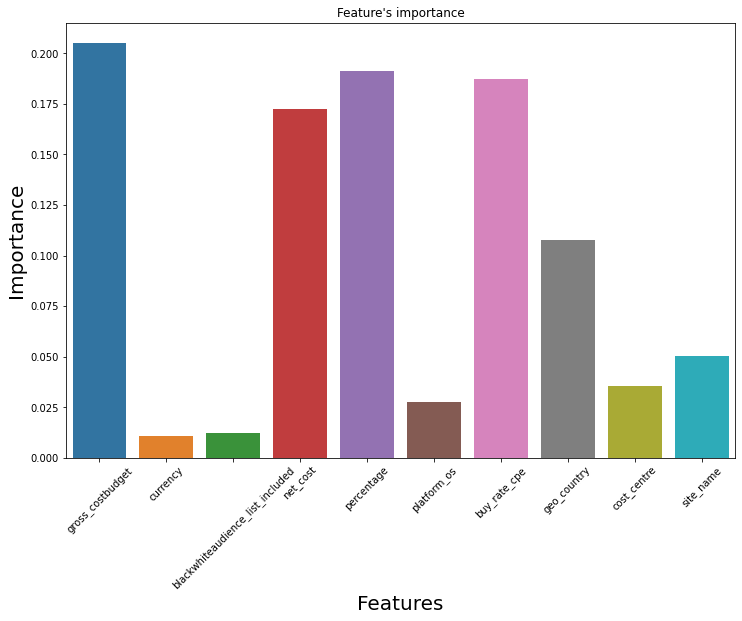

In [12]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='sixth_run')

# Grid Search with Cross Validation

In [20]:
model = RandomForestRegressor(n_estimators=20)
random_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

inside train pipeline
inside label encoder


2022-08-10 20:28:38,852:logger:successfully got catagorical columns
2022-08-10 20:28:38,856:logger:successfully got catagorical columns
2022-08-10 20:28:38,867:logger:successfully got numerical columns


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  27.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  37.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=  46.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=  56.8s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=  57.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time= 1.0min
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  33.5

2022-08-10 20:35:18,211:logger:RMSE Score: 6.358397524017239
2022-08-10 20:35:18,214:logger:R2_Squared: -0.39802337732782633
2022-08-10 20:35:18,216:logger:MAE Score: 5.1241731802340595
2022-08-10 20:35:18,224:logger:Accuracy: 44.76 %.
2022-08-10 20:35:18,338:logger:feature importance plotted
2022-08-10 20:37:18,550:logger:API request to http://localhost:5000/api/2.0/mlflow/experiments/list failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/list?view_type=ALL (Caused by ResponseError('too many 500 error responses'))


Run - fine_tuned is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 6.36, 'R2_Squared': -0.4, 'MAE Score': 5.12}

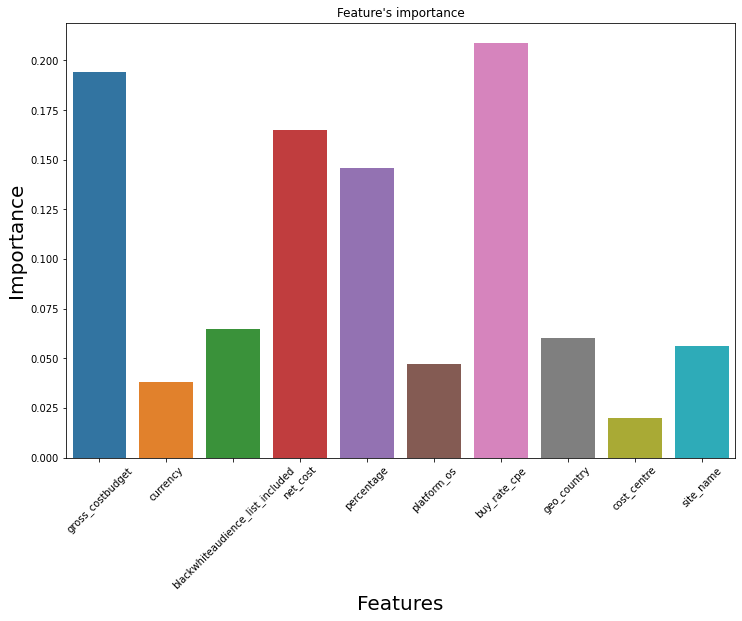

In [21]:
run_train_pipeline(rf_random, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='fine_tuned')

# Classification Using Multinomial Naive Bayes Algorithm

In [17]:
model = GaussianNB()
str(model)

'GaussianNB()'

In [18]:
y_for_xg = pd.DataFrame(y)
y_for_xg['ER'] = y_for_xg['ER'].astype(int)
y_for_xg
run_train_pipeline(model, x, y_for_xg['ER'], 
                experiment_name='gaussian with cleaned data',
                run_name='sixth_run')

inside train pipeline
inside label encoder


2022-08-10 20:24:11,433:logger:successfully got catagorical columns
2022-08-10 20:24:11,439:logger:successfully got catagorical columns
2022-08-10 20:24:11,465:logger:successfully got numerical columns
2022-08-10 20:24:11,964:logger:RMSE Score: 6.154856473109968
2022-08-10 20:24:11,966:logger:R2_Squared: -0.37698436662628665
2022-08-10 20:24:11,967:logger:MAE Score: 5.263612464177726
2022-08-10 20:24:11,975:logger:Accuracy: 49.98 %.
2022-08-10 20:24:11,978:logger:'GaussianNB' object has no attribute 'best_estimator_'
2022-08-10 20:24:11,981:logger:'list' object has no attribute 'keys'
2022-08-10 20:26:12,193:logger:API request to http://localhost:5000/api/2.0/mlflow/experiments/list failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/list?view_type=ALL (Caused by ResponseError('too many 500 error responses'))


Run - sixth_run is logged to Experiment - XGB with cleaned data


{'RMSE Score': 6.15, 'R2_Squared': -0.38, 'MAE Score': 5.26}